# Using Data From ANES to Form A Data-Driven on Trump Voters

In [114]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats
from scipy.stats import kurtosis, skew
from pprint import pprint
import seaborn as sns

In [115]:
# Import ANES data file; read the second tab that contains the data
anes_raw = pd.read_excel('assignment_1.xlsx', 'data')

In [116]:
# Read head
anes_raw.head()

,caseid,weight_pre,weight_post,sampvar,varstrat,interest_politics,interest_campaign,state_reg,party_reg,primary_voter,...,union,ethnicity,children,income,health,getcovid,satisfied,vote,region,whovoted
0,200015,0.962809,1.005737,2,9,2.0,2,40.0,2.0,1.0,...,2.0,3.0,0.0,21.0,4.0,2.0,1.0,NaN,3,NaN
1,200053,1.262294,0.965789,1,23,2.0,2,8.0,4.0,1.0,...,2.0,5.0,0.0,22.0,3.0,2.0,2.0,1.0,4,2.0
2,200084,0.449005,0.4407,1,7,4.0,2,55.0,NaN,2.0,...,2.0,1.0,3.0,4.0,3.0,2.0,1.0,1.0,2,2.0
3,200091,0.616581,0.76943,2,37,4.0,3,NaN,NaN,2.0,...,2.0,1.0,0.0,3.0,5.0,2.0,5.0,NaN,3,NaN
4,200107,1.426270,1.421516,2,32,3.0,2,4.0,4.0,2.0,...,2.0,1.0,0.0,10.0,3.0,2.0,2.0,NaN,4,NaN


In [118]:
# Read tail
anes_raw.tail()

,caseid,weight_pre,weight_post,sampvar,varstrat,interest_politics,interest_campaign,state_reg,party_reg,primary_voter,...,union,ethnicity,children,income,health,getcovid,satisfied,vote,region,whovoted
4838,535292,0.739977,0.372394,1,2,1.0,1,22.0,1.0,2.0,...,2.0,1.0,0.0,2.0,4.0,2.0,1.0,1.0,3,2.0
4839,535308,0.290011,0.118923,2,2,4.0,2,19.0,NaN,2.0,...,2.0,1.0,0.0,NaN,1.0,2.0,1.0,1.0,2,2.0
4840,535315,1.052041,2.541941,1,3,1.0,1,12.0,2.0,2.0,...,2.0,1.0,2.0,8.0,2.0,2.0,2.0,NaN,3,NaN
4841,535360,1.124100,0.907123,2,5,4.0,2,16.0,2.0,2.0,...,2.0,1.0,0.0,19.0,3.0,2.0,1.0,1.0,4,2.0
4842,535421,0.292352,0.161853,2,8,2.0,1,51.0,NaN,2.0,...,2.0,1.0,0.0,14.0,1.0,2.0,1.0,NaN,3,NaN


### Data Preprocessing and Cleaning

In [119]:
# Inspect the column names in the file
anes_raw.columns

Index(['caseid', 'weight_pre', 'weight_post', 'sampvar', 'varstrat',
       'interest_politics', 'interest_campaign', 'state_reg', 'party_reg',
       'primary_voter', 'pol_spectrum', 'party_id', 'party_salience',
       'gov_trust', 'gov_interests', 'gov_waste', 'gov_corrup',
       'people_trusted', 'gov_responsive', 'better_economy', 'better_health',
       'better_immigratino', 'better_taxes', 'better_environment',
       'better_covid', 'fav_deathpen', 'stayhome', 'trust_media', 'corr_trump',
       'fav_impeach', 'fav_senacquittal', 'covid_gov', 'covid_reopen',
       'inc_gap', 'gov_climate', 'samesex', 'transgender', 'lgbtlaw',
       'birthright', 'deportkids', 'wall', 'russianinterfere', 'religion',
       'age', 'marital', 'education', 'spouse_edu', 'armedforces', 'labor',
       'union', 'ethnicity', 'children', 'income', 'health', 'getcovid',
       'satisfied', 'vote', 'region', 'whovoted'],
      dtype='object')

In [120]:
# Quick inspection of file structure, i.e. columns, null (missing values), data types
anes_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 59 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   caseid              4843 non-null   int64  
 1   weight_pre          4843 non-null   float64
 2   weight_post         4843 non-null   object 
 3   sampvar             4843 non-null   int64  
 4   varstrat            4843 non-null   int64  
 5   interest_politics   4842 non-null   float64
 6   interest_campaign   4843 non-null   int64  
 7   state_reg           4192 non-null   float64
 8   party_reg           2268 non-null   float64
 9   primary_voter       4830 non-null   float64
 10  pol_spectrum        4021 non-null   float64
 11  party_id            4814 non-null   float64
 12  party_salience      4613 non-null   float64
 13  gov_trust           4821 non-null   float64
 14  gov_interests       4767 non-null   float64
 15  gov_waste           4821 non-null   float64
 16  gov_co

### Because the columns in the file do not have the same amount of non-null data, we need to create a dataframe to hold only the non-null records

In [121]:
# Drop all Nulls
anes_new = anes_raw.dropna()

In [122]:
# Inspect the file again to ensure all columns have the same amount of non-nulls
anes_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642 entries, 22 to 4841
Data columns (total 59 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   caseid              642 non-null    int64  
 1   weight_pre          642 non-null    float64
 2   weight_post         642 non-null    object 
 3   sampvar             642 non-null    int64  
 4   varstrat            642 non-null    int64  
 5   interest_politics   642 non-null    float64
 6   interest_campaign   642 non-null    int64  
 7   state_reg           642 non-null    float64
 8   party_reg           642 non-null    float64
 9   primary_voter       642 non-null    float64
 10  pol_spectrum        642 non-null    float64
 11  party_id            642 non-null    float64
 12  party_salience      642 non-null    float64
 13  gov_trust           642 non-null    float64
 14  gov_interests       642 non-null    float64
 15  gov_waste           642 non-null    float64
 16  gov_co

### The following columns are only informational and can be dropped: caseid, weight_pre, weight_post, sampvar

In [123]:
anes_new.drop(columns=['weight_pre', 'weight_post', 'sampvar'], axis=1, inplace=True)

C:\Users\esuba\anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [124]:
anes_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642 entries, 22 to 4841
Data columns (total 56 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   caseid              642 non-null    int64  
 1   varstrat            642 non-null    int64  
 2   interest_politics   642 non-null    float64
 3   interest_campaign   642 non-null    int64  
 4   state_reg           642 non-null    float64
 5   party_reg           642 non-null    float64
 6   primary_voter       642 non-null    float64
 7   pol_spectrum        642 non-null    float64
 8   party_id            642 non-null    float64
 9   party_salience      642 non-null    float64
 10  gov_trust           642 non-null    float64
 11  gov_interests       642 non-null    float64
 12  gov_waste           642 non-null    float64
 13  gov_corrup          642 non-null    float64
 14  people_trusted      642 non-null    float64
 15  gov_responsive      642 non-null    float64
 16  better

<AxesSubplot:xlabel='varstrat', ylabel='count'>

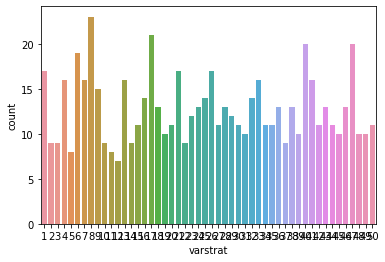

In [125]:
sns.countplot(anes_new.varstrat)

In [130]:
# Count the frequencies of the stratms in the data file
#min_varstrat = anes_new.groupby('varstrat').count().min()
#min_varstrat

In [131]:
#anes_new.varstrat.count().min()

In [63]:
#anes_new.head()

,caseid,varstrat,interest_politics,interest_campaign,state_reg,party_reg,primary_voter,pol_spectrum,party_id,party_salience,...,union,ethnicity,children,income,health,getcovid,satisfied,vote,region,whovoted
3,200046,29,2.0,3,6.0,2.0,2.0,3.0,6.0,3.0,...,2.0,4.0,1.0,7.0,3.0,2.0,1.0,1.0,4,1.0
16,200190,1,1.0,1,25.0,4.0,2.0,3.0,3.0,4.0,...,2.0,1.0,2.0,22.0,2.0,2.0,2.0,1.0,1,1.0
28,200381,36,1.0,1,36.0,2.0,2.0,5.0,6.0,4.0,...,2.0,1.0,0.0,22.0,3.0,2.0,2.0,1.0,1,1.0
29,200404,36,3.0,2,4.0,1.0,1.0,4.0,1.0,3.0,...,2.0,3.0,2.0,15.0,2.0,2.0,3.0,1.0,4,1.0
38,200503,35,1.0,1,5.0,1.0,2.0,1.0,1.0,2.0,...,2.0,1.0,0.0,8.0,2.0,2.0,2.0,1.0,3,1.0


In [132]:
anes_new.shape

(642, 56)

#### To balance our  model, we need 50 varstrat cetegories times 21 voter results = 1050 records across all columns

### This implies the stratrum with the least amount of records has 21 records; in order to create a balanced dataset we need to only analyze 21 records across all of the stratum; our entire populati0n will contain 1050 unique records

In [129]:
#anes_list = []
#varstrat_list = {}
#row_number = 0
#anes_df = pd.DataFrame()
#varstrat_count = {}
#for index, row in anes_new.iterrows():
    #print(list(row)[1])
 #   if list(row)[1] not in varstrat_list.keys():
  #      varstrat_count[list(row)[1]] = 0
   #     varstrat_list[list(row)[1]] = []      
    #if list(row)[1] in varstrat_list.keys():
     #   #varstrat_count[list(row)[1]] += 1
      #  if len(varstrat_list[list(row)[1]]) <= 20:
       #     varstrat_count[list(row)[1]] += 1
            
        #    varstrat_list[list(row)[1]].append(list(row))
#varstrat_df = pd.DataFrame(columns=list(anes_new.columns))
#pprint(varstrat_count)
#for key in varstrat_list.keys():
 #   for row in varstrat_list[key]:
        #varstrat_df.append(row)
        #print(row)
  #      varstrat_df.loc[len(varstrat_df)] = row
        #print(varstrat_list[list(row)[1]])

#### The for loop creates 21 records per stratum

In [133]:
#varstrat_df

In [134]:
anes_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642 entries, 22 to 4841
Data columns (total 56 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   caseid              642 non-null    int64  
 1   varstrat            642 non-null    int64  
 2   interest_politics   642 non-null    float64
 3   interest_campaign   642 non-null    int64  
 4   state_reg           642 non-null    float64
 5   party_reg           642 non-null    float64
 6   primary_voter       642 non-null    float64
 7   pol_spectrum        642 non-null    float64
 8   party_id            642 non-null    float64
 9   party_salience      642 non-null    float64
 10  gov_trust           642 non-null    float64
 11  gov_interests       642 non-null    float64
 12  gov_waste           642 non-null    float64
 13  gov_corrup          642 non-null    float64
 14  people_trusted      642 non-null    float64
 15  gov_responsive      642 non-null    float64
 16  better

In [68]:
#anes_list

[]

In [135]:
anes_new.describe()

,caseid,varstrat,interest_politics,interest_campaign,state_reg,party_reg,primary_voter,pol_spectrum,party_id,party_salience,...,union,ethnicity,children,income,health,getcovid,satisfied,vote,region,whovoted
count,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,...,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.0,642.000000,642.0
mean,325661.616822,25.186916,2.126168,1.557632,23.704050,2.392523,1.496885,5.520249,6.014019,3.129283,...,1.852025,1.426791,0.750779,14.014019,2.429907,1.957944,2.137072,1.0,2.741433,2.0
std,100712.281127,14.465709,0.930318,0.684538,14.536938,0.945541,0.500380,1.074623,1.298549,1.367251,...,0.355352,1.168395,1.111649,6.171606,0.979785,0.200874,0.850748,0.0,1.129023,0.0
min,200558.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,2.0
25%,223217.750000,13.000000,1.000000,1.000000,10.250000,2.000000,1.000000,5.000000,5.000000,2.000000,...,2.000000,1.000000,0.000000,10.000000,2.000000,2.000000,2.000000,1.0,2.000000,2.0
50%,333125.000000,25.000000,2.000000,1.000000,22.000000,2.000000,1.000000,6.000000,7.000000,3.000000,...,2.000000,1.000000,0.000000,16.000000,2.000000,2.000000,2.000000,1.0,3.000000,2.0
75%,417846.500000,38.000000,3.000000,2.000000,37.000000,2.000000,2.000000,6.000000,7.000000,4.000000,...,2.000000,1.000000,1.000000,19.000000,3.000000,2.000000,3.000000,1.0,4.000000,2.0
max,535360.000000,50.000000,5.000000,3.000000,54.000000,5.000000,2.000000,7.000000,7.000000,5.000000,...,2.000000,6.000000,4.000000,22.000000,5.000000,2.000000,5.000000,1.0,4.000000,2.0


In [70]:
from pathlib import Path

In [71]:
Path.cwd()

WindowsPath('C:/Users/esuba/data_712/project_1')

In [136]:
#varstrat_df.describe()

In [82]:
#varstrat_df.corr()

In [138]:
anes_new.columns

Index(['caseid', 'varstrat', 'interest_politics', 'interest_campaign',
       'state_reg', 'party_reg', 'primary_voter', 'pol_spectrum', 'party_id',
       'party_salience', 'gov_trust', 'gov_interests', 'gov_waste',
       'gov_corrup', 'people_trusted', 'gov_responsive', 'better_economy',
       'better_health', 'better_immigratino', 'better_taxes',
       'better_environment', 'better_covid', 'fav_deathpen', 'stayhome',
       'trust_media', 'corr_trump', 'fav_impeach', 'fav_senacquittal',
       'covid_gov', 'covid_reopen', 'inc_gap', 'gov_climate', 'samesex',
       'transgender', 'lgbtlaw', 'birthright', 'deportkids', 'wall',
       'russianinterfere', 'religion', 'age', 'marital', 'education',
       'spouse_edu', 'armedforces', 'labor', 'union', 'ethnicity', 'children',
       'income', 'health', 'getcovid', 'satisfied', 'vote', 'region',
       'whovoted'],
      dtype='object')

In [139]:
# Create the model with scikit-learn
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [141]:
# Plot X independent variable (voter data) against y dependent variable
x = anes_new[['interest_politics', 'interest_campaign',
       'state_reg', 'party_reg', 'primary_voter', 'pol_spectrum', 'party_id',
       'party_salience', 'gov_trust', 'gov_interests', 'gov_waste',
       'gov_corrup', 'people_trusted', 'gov_responsive', 'better_economy',
       'better_health', 'better_immigratino', 'better_taxes',
       'better_environment', 'better_covid', 'fav_deathpen', 'stayhome',
       'trust_media', 'corr_trump', 'fav_impeach', 'fav_senacquittal',
       'covid_gov', 'covid_reopen', 'inc_gap', 'gov_climate', 'samesex',
       'transgender', 'lgbtlaw', 'birthright', 'deportkids', 'wall',
       'russianinterfere', 'religion', 'age', 'marital', 'education',
       'spouse_edu', 'armedforces', 'labor', 'union', 'ethnicity', 'children',
       'income', 'health', 'getcovid', 'satisfied', 'region']]
y = anes_new.whovoted

In [142]:
# Fit data into the model
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [143]:
# with statsmodels
constant = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

In [103]:
top_5 = anova_results.sort_values(by='coef', ascending=False).head(5)
top_5

,coef,std err,t,P>|t|,[0.025,0.975]
top_5,,,,,,
getcovid,0.1100,0.034,3.205,0.001,0.043,0.177
better_immigratino,0.0834,0.010,8.100,0.000,0.063,0.104
armedforces,0.0602,0.018,3.366,0.001,0.025,0.095
gov_interests,0.0590,0.022,2.669,0.008,0.016,0.102
primary_voter,0.0441,0.014,3.089,0.002,0.016,0.072


In [47]:
# Create a dataframe for coefficients
anova_coeff = anova_results['coefficient']
anova_coeff.head()

survey_categories
interest_politics   -0.0052
interest_campaign    0.0340
state_reg            0.0015
party_reg           -0.0073
primary_voter        0.0123
Name: coefficient, dtype: float64

In [ ]:
# create index column
anova_results = anova_results

In [40]:
#create basic scatterplot
#plt.plot(x, y, 'o')

In [ ]:
# Using pandas profiling package to streamline the data
anes_profile = ProfileReport(varstrat_df)
anes_profile

In [ ]:
# Generate html report
anes_profile.to_file('anes_profile.html')

In [ ]:
# Create the model with scikit-learn
model = LinearRegression()
model

In [ ]:
# Generate pdf report
anes_profile.to_file('anes_profile.pdf')